Ejercicio 1

La estimación de los parámetros para el modelo de regresión son: 
beta1:  0.1086107819535774
beta0:  49.07163369547534


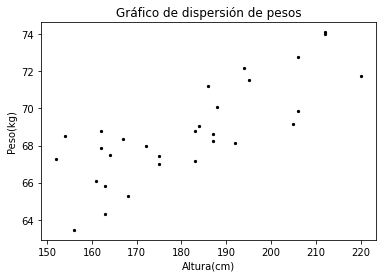

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
datos = pd.read_csv(r"Ejercicio_1.1.csv")
datos_y=datos.loc[: , "Peso"]
datos_x=datos.loc[: , "Altura"]
plt.scatter(x=datos_x, y=datos_y,marker='o',c='black', s=5)
plt.title("Gráfico de dispersión de pesos")
plt.xlabel("Altura(cm)")
plt.ylabel("Peso(kg)")
array_x=np.array(datos_x)
array_y=np.array(datos_y)
n=len(array_x)
sum_x=sum(array_x)
sum_y=sum(array_y)
sum_xy=sum(array_x*array_y)
sum_xx=sum(array_x*array_x)
sum_yy=sum(array_y*array_y)
s_xy=sum_xy-(1/n)*sum_x*sum_y
s_xx=sum_xx-(1/n)*sum_x**2
beta_1=s_xy/s_xx
beta_0=(1/n)*sum_y-beta_1*(1/n)*sum_x
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: ", (beta_1))
print("beta0: ", (beta_0))

Estos modelos nos llevan a que el modelo de regresión para alturas vs peso es:
y=49.0716+0.1086x

Text(0, 0.5, 'Peso(kg)')

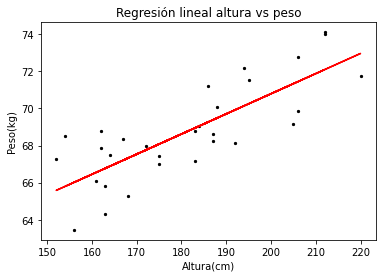

In [2]:
plt.scatter(x=datos_x, y=datos_y,marker='o',c='black', s=5)
plt.plot(array_x, beta_0+beta_1*array_x, '-', c='red')
plt.title("Regresión lineal altura vs peso")
plt.xlabel("Altura(cm)")
plt.ylabel("Peso(kg)") 

Ejercicio 2

In [3]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [5]:
dataset = pd.read_csv(r'Ejercicio_1.2.csv', header = None)
dataset.head()

,0,1,2,3
0,A,B,C,E
1,B,E,NaN,NaN
2,C,D,E,NaN
3,A,C,D,NaN
4,A,C,E,NaN


In [6]:
transactions = []
for i in range(0, 5):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 4) if str(dataset.values[i,j]) != "nan"])
transactions

[['A', 'B', 'C', 'E'],
 ['B', 'E'],
 ['C', 'D', 'E'],
 ['A', 'C', 'D'],
 ['A', 'C', 'E']]

In [7]:
rules = apriori(transactions, min_support = 0.5)
results = list(rules)
results

[RelationRecord(items=frozenset({'A'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'A'}), confidence=0.6, lift=1.0)]),
 RelationRecord(items=frozenset({'C'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'E'}), support=0.8, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'E'}), confidence=0.8, lift=1.0)]),
 RelationRecord(items=frozenset({'C', 'A'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'C', 'A'}), confidence=0.6, lift=1.0), OrderedStatistic(items_base=frozenset({'A'}), items_add=frozenset({'C'}), confidence=1.0, lift=1.25), OrderedStatistic(items_base=frozenset({'C'}), items_add=frozenset({'A'}), confidence=0.7499999999999999, lift=1.2499999999999998)]),
 RelationRecord(items=frozenset({'C', 'E'}), support=0.6, ordered_statist

In [8]:
antecedents = [tuple(item[0]) for result in results for item in result[2]]
consecuents = [tuple(item[1]) for result in results for item in result[2]]
supports = [result[1] for result in results for item in result[2]]
confidences = [item[2] for result in results for item in result[2]]
lifts = [item[3] for result in results for item in result[2]]
table = list(zip(antecedents, consecuents, supports, confidences, lifts))
pd.DataFrame(table, columns = ['Antecedente', 'Consecuente', 'Soporte', 'Confianza', 'Lift'])

,Antecedente,Consecuente,Soporte,Confianza,Lift
0,(),"(A,)",0.6,0.60,1.0000
1,(),"(C,)",0.8,0.80,1.0000
2,(),"(E,)",0.8,0.80,1.0000
3,(),"(C, A)",0.6,0.60,1.0000
4,"(A,)","(C,)",0.6,1.00,1.2500
5,"(C,)","(A,)",0.6,0.75,1.2500
6,(),"(C, E)",0.6,0.60,1.0000
7,"(C,)","(E,)",0.6,0.75,0.9375
8,"(E,)","(C,)",0.6,0.75,0.9375


El nivel de soporte más alto con umbral de 0.5 es K = 2.
Tenemos las siguientes reglas de asociación:
A -> C , C -> A , C -> E , E -> C